
#	Correcting Data Classification and creating a good database
#	AUTHOR: 乔昂 - jueta
#	DATE: 13/12/2022


In [2]:
import pandas as pd

In [38]:
df = pd.read_feather("Data/map-24-02.feather")

In [39]:
df.head()

,index,name,current,flow_rate,voltage,current_PS,temperature,humidity,date_and_time,target_voltage,mean,variance,deviation,median,rms,spray_mode
0,sample 0,setup/liquid/ethanol,"[-1.00628924369812, 1.257861614227295, -1.7610...",0.1,4501.53,-5.235980e-09,0.0,0,2023-02-23 16:21:21.568402,4500,0.828131,26.359732,5.134173,1.006289,5.200532,Dripping
1,sample 1,setup/liquid/ethanol,"[8.050313949584961, 6.792452812194824, 1.50943...",0.1,4501.53,-5.235980e-09,23.2,0,2023-02-23 16:21:22.276984,4500,0.656810,26.365038,5.134690,0.754717,5.176528,Dripping
2,sample 2,setup/liquid/ethanol,"[2.51572322845459, 3.2704403400421143, 0.50314...",0.1,4501.53,-5.235980e-09,23.2,28,2023-02-23 16:21:23.097191,4500,0.737263,26.111904,5.109981,1.006289,5.162893,Dripping
3,sample 3,setup/liquid/ethanol,"[-1.509433984756469, 2.01257848739624, -0.5031...",0.1,4501.53,-5.235980e-09,23.2,28,2023-02-23 16:21:23.793990,4500,0.839447,26.621998,5.159651,1.006289,5.227492,Dripping
4,sample 4,setup/liquid/ethanol,"[3.018867969512939, 7.295597553253174, 3.77358...",0.1,4601.34,8.029310e-09,23.2,28,2023-02-23 16:21:24.510586,4600,0.719472,25.212761,5.021231,1.006289,5.072514,Dripping


In [5]:
'''
	Analysis of mapping V x FR experiments
	AUTHOR: 乔昂 - jueta
	DATE: 19/01/2023
'''

import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
from sklearn.utils import column_or_1d
import numpy as np
from scipy.signal import butter, lfilter



In [7]:


colormap = []
for electro_class in df['spray_mode']:
    if electro_class == 'Intermittent':
        colormap.append('blue')
    elif electro_class == 'Cone Jet':
        colormap.append('red')
    elif electro_class == 'Dripping':
        colormap.append('green')
    elif electro_class == 'Multi Jet':
        colormap.append('purple')
    elif electro_class == 'Corona':
        colormap.append('cyan')
    elif electro_class == 'Undefined':
        colormap.append('black')
    else:
        colormap.append('black')


df.insert(1, 'colormap', colormap)


In [8]:

print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3451 entries, 0 to 3450
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           3451 non-null   object        
 1   colormap        3451 non-null   object        
 2   name            3451 non-null   object        
 3   current         3451 non-null   object        
 4   flow_rate       3451 non-null   float64       
 5   voltage         3451 non-null   float64       
 6   current_PS      3451 non-null   float64       
 7   temperature     3451 non-null   float64       
 8   humidity        3451 non-null   int64         
 9   date_and_time   3451 non-null   datetime64[ns]
 10  target_voltage  3451 non-null   int64         
 11  mean            3451 non-null   float64       
 12  variance        3451 non-null   float64       
 13  deviation       3451 non-null   float64       
 14  median          3451 non-null   float64       
 15  rms 

## Using Matplotlib

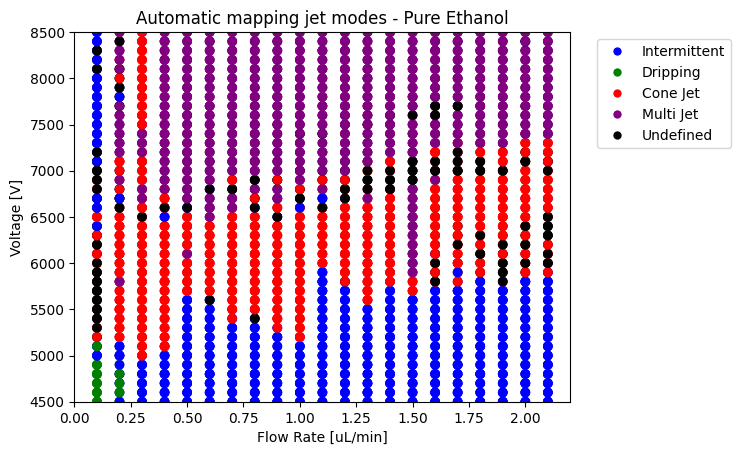

In [36]:


# df['flow rate [m3/s]'] = df['flow rate [m3/s]'].astype(float)
plt.scatter(df['flow_rate'], df['target_voltage'], color=df['colormap'])
plt.ylabel('Voltage [V]')
plt.ylim(4500,8500)
plt.xlabel('Flow Rate [uL/min]')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Intermittent', markerfacecolor='blue', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Dripping', markerfacecolor='green', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Cone Jet', markerfacecolor='red', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Multi Jet', markerfacecolor='purple', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Undefined', markerfacecolor='black', markersize=7)]

plt.title("Automatic mapping jet modes - Pure Ethanol")
plt.legend(handles=legend_elements, bbox_to_anchor=(1.04, 1))

plt.show()


## Using Plotly express

In [37]:
import pandas as pd
import plotly.express as px

px.scatter(df, 'flow_rate', 'target_voltage', color="spray_mode")

# -----------------

### Playing with Neural Networks in mapping

In [36]:
x1 = df['flow rate [m3/s]']
x2 = df['voltage']
y = df['colormap']

data_out = pd.concat([x1, x2, y], axis=1).rename(columns={'flow rate [m3/s]':'x1', 'voltage':'x2', 'colormap':'y'})


yout = []
for electro_class in data_out['y']:
    if electro_class == 'red':
        yout.append(1)
    else:
        yout.append(0)


data_out.insert(2, 'yout', yout)
data_out = data_out.drop(columns=['y'])

print(data_out)

nump = data_out.to_numpy()

print(nump)



data_out.to_csv('testing.csv')

        x1       x2  yout
0     0.01  4001.61     0
1     0.01  4001.61     0
2     0.01  4051.34     0
3     0.01  4051.34     0
4     0.01  4101.44     0
...    ...      ...   ...
3258  1.60  8951.23     0
3259  1.60  8951.23     0
3260  1.60  8951.23     0
3261  1.60  8951.23     0
3262  1.60  8951.23     0

[3263 rows x 3 columns]
[[0.01 '4001.61' 0]
 [0.01 '4001.61' 0]
 [0.01 '4051.34' 0]
 ...
 [1.6 '8951.23' 0]
 [1.6 '8951.23' 0]
 [1.6 '8951.23' 0]]


In [ ]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")


X, y = testing1
print(X, y)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
# Plot the training points
ax = plt.subplot(1,1,1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

clf.fit(X, y)

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
else:
    Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

# Plot also the training points
ax.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap=cm_bright,
    edgecolors="black",
    s=25,
)


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()